<h1 style="font-size:30px">Desafio Data Science</h1>
<hr>

Importando as bibliotecas

In [1]:
# Numpy para computação numérica
import numpy as np

# Pandas para dataframes
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplolib para visualização
from matplotlib import pyplot as plt
# exibir gráficos no notebook
%matplotlib inline

# Seaborn para visualização simplificada
import seaborn as sns

Carregando o banco de dados

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

Informações básicas

In [3]:
# Dimensões do banco de dados
df.shape

(45211, 17)

In [4]:
# Datatype das features
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# Primeiras 5 linhas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h1 style="font-size:18px">Questões</h1>
<hr>

1 - Qual a profissão tem mais tendência a fazer um empréstimo? De qual tipo?<br>

A partir dos gráficos abaixo, é possível observar que a profissão com maior tendência é o operário (**blue-collar**) para o empréstimo do tipo imobiliário (**housing loan**).

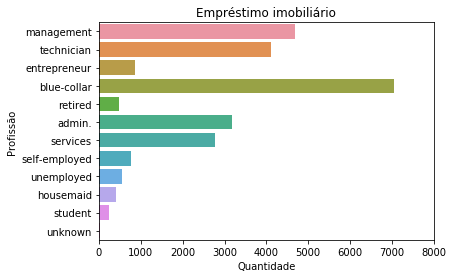

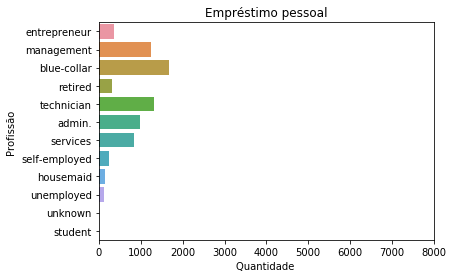

In [6]:
# Gráfico de barras do número de empréstimo imobiliários em relação às profissões
sns.countplot(y = 'job', data = df[df.housing == 'yes'])
plt.title('Empréstimo imobiliário')
plt.xlabel('Quantidade')
plt.ylabel('Profissão')
plt.xlim(0,8000)
plt.show()

# Gráfico de barras do número de empréstimo pessoal em relação às profissões
sns.countplot(y = 'job', data = df[df.loan == 'yes'])
plt.title('Empréstimo pessoal')
plt.xlabel('Quantidade ')
plt.ylabel('Profissão ')
plt.xlim(0,8000)
plt.show()

2 - Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?<br>

Observando o histograma abaixo, nota-se que a maior quantidade de sucesso da campanha são decorrentes dos primeiros contatos, apresentando maior densidade nos três primeiros contatos. Sendo o contato através do celular o mais proeminente.

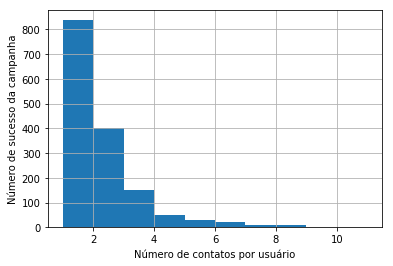

In [7]:
# Histograma do número de contatos pela quantidade de sucesso da campanha
df[df.poutcome == 'success'].campaign.hist()
plt.xlabel('Número de contatos por usuário')
plt.ylabel('Número de sucesso da campanha')
plt.show()

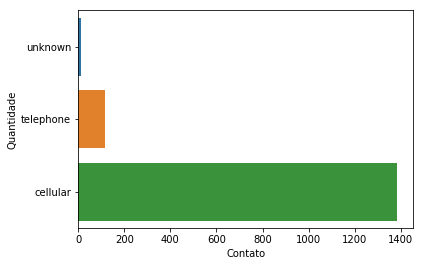

In [8]:
# Gráfico de barras do tipo de contato e o número de sucesso da campanha
sns.countplot(y = 'contact', data = df[df.poutcome == 'success'])
plt.xlabel('Contato')
plt.ylabel('Quantidade')
plt.show()

3 - Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?<br>

Com base no resumo estatístico abaixo, dos resultados bem sucedidos desta campanha, indico o **número médio de 2 ligações com no máximo 3 ligações por cliente**. Uma vez que os dados apresentam uma média de 1.8 ligações, onde 75% dos dados apresentam sucesso com 2 ligações.

In [9]:
# Resumo estatístico da campanha atual
df[df.poutcome == 'success'].campaign.describe()

count    1511.000000
mean        1.806089
std         1.269141
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: campaign, dtype: float64

4 - O resultado da campanha anterior tem relevância na campanha atual?<br>

De acordo com o histograma, comparando a campanha anterior com a atual, observa-se que há influência da campanha anterior já que grande parte das adesões foram feitas logo no primeiro contato. Isso também pode ser observado no gráfico de linha, na qual nenhum sucesso foi alcançado na primeira chamada sem que houvesse pelo menos um contato da campanha anterior.

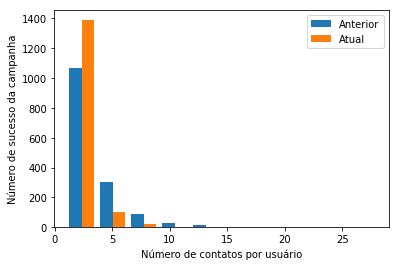

In [10]:
# Histograma comparativo do número de contatos anteriores e atuais com relação à quantidade de sucesso da campanha
plt.hist(x = (df[df.poutcome == 'success'].previous, (df[df.poutcome == 'success'].campaign)), label = ('Anterior','Atual'))
plt.legend()
plt.xlabel('Número de contatos por usuário')
plt.ylabel('Número de sucesso da campanha')
plt.show()

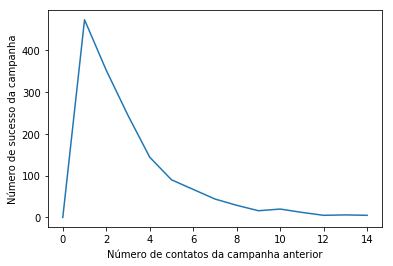

In [11]:
# Cria um vetor com a quantidade de sucessos na campanha atual para os diferentes números de contato da campanha anterior
vetor = []
for i in range(0,15):
    vetor.append(((df.poutcome == 'success') & (df.previous == i)).astype(int).sum())

plt.plot(vetor)
plt.xlabel('Número de contatos da campanha anterior')
plt.ylabel('Número de sucesso da campanha')
plt.show()

5 - Qual o fator determinante para que o banco exija um seguro de crédito?<br>

De acordo com os resumos estatísticos abaixo, o fator determinante é o saldo médio anual.

In [12]:
# Comparativo estatístico para exigir um seguro de crédito
df.groupby('y').describe()

age                                                      balance  \
       count       mean        std   min   25%   50%   75%   max    count   
y                                                                           
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0  39922.0   
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0   5289.0   

                                                                       \
            mean          std     min    25%    50%     75%       max   
y                                                                       
no   1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0   
yes  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0   

    campaign                                                    day  \
       count      mean       std  min  25%  50%  75%   max    count   
y                                                                     
no   39922.0  2.846350  3.212767  1.0  1.0  2.0  3.0  63.0  39922.0   
yes   5289.0  2.141047  1.921826  1.0  1.0  2.0  3.0  32.0   5289.0   

                                                     duration              \
          mean       std  min  25%   50%   75%   max    count        mean   
y                                                                           
no   15.892290  8.294728  1.0  8.0  16.0  21.0  31.0  39922.0  221.182806   
yes  15.158253  8.501875  1.0  8.0  15.0  22.0  31.0   5289.0  537.294574   

                                                     pdays             \
            std  min    25%    50%    75%     max    count       mean   
y                                                                       
no   207.383237  0.0   95.0  164.0  279.0  4918.0  39922.0  36.421372   
yes  392.525262  8.0  244.0  426.0  725.0  3881.0   5289.0  68.702968   

                                            previous                           \
            std  min  25%  50%   75%    max    count      mean       std  min   
y                                                                               
no    96.757135 -1.0 -1.0 -1.0  -1.0  871.0  39922.0  0.502154  2.256771  0.0   
yes  118.822266 -1.0 -1.0 -1.0  98.0  854.0   5289.0  1.170354  2.553272  0.0   

                           
     25%  50%  75%    max  
y                          
no   0.0  0.0  0.0  275.0  
yes  0.0  0.0  1.0   58.0

In [13]:
df[df.y == 'no'].describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
unique,12,3,4,2,2,2,3,12,4,1
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9024,24459,20752,39159,23195,33162,24916,12841,33573,39922


In [14]:
# Resumo estatístico das features categóricas
df[df.y == 'yes'].describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289
unique,12,3,4,2,2,2,3,12,4,1
top,management,married,secondary,no,no,no,cellular,may,unknown,yes
freq,1301,2755,2450,5237,3354,4805,4369,925,3386,5289


6 - Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?<br>

As características mais proeminentes do cliente são saldo médio anual menor do que 500 euros, casado e com educação secundária.<br>
A média do saldo médio, embora seja de 1175 euros, mais de 50% dos clientes possuem um saldo menor ou igual a 412 euros. Além disso, (15321/25130 = 0.61) 61% dos clientes são casados, e (14038/25130 = 0.56) 56% apresentam educação secundária.

In [15]:
# Resumo estatístico para haver empréstimo imobiliário das features numéricas
df[df.housing == 'yes'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000
mean,39.175288,1175.103064,15.598249,259.331476,2.698488,51.312495,0.656665
std,8.926807,2483.285761,8.026836,258.321907,3.140979,113.862848,2.707428
min,20.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,62.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,38.000000,412.000000,15.000000,182.000000,2.000000,-1.000000,0.000000
75%,45.000000,1257.750000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,78.000000,58544.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


In [16]:
# Resumo estatístico para haver empréstimo imobiliário das features categóricas
df[df.housing == 'yes'].describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130
unique,12,3,4,2,1,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7048,15321,14038,24695,25130,20763,14603,12076,19990,23195
